this is an outline notebook- sections are suggested steps, but more or less steps can be followed to reach your end goal

# Regression problem -  predicting real estate prices in USD


#### Background: 
You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

#### Objective: 
The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses which have the greatest impact on price, eg. understanding which factors are responsible for the highest property values - USD650K and above. 

#### Data: 
The data set consists of information on some 22,000 properties.  The dataset consisted of historic data for houses sold between May 2014 to May 2015. 

#### Definitions 
These are the definitions of data variables provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

+ Id: Unique identification number for the property.
+ date: date the house was sold.
+ price: price of the house.
+ waterfront: house which has a view to a waterfront.
+ condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent.
+ view: does the property have a view? and of what quality?
+ grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
+ Sqft_above: square footage of house apart from basement.
+ Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
+ Sqft_lot15: lotSize area in 2015(implies - some renovations).

#### Exploring the data
We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. 
To explore the data, you can use the techniques such as data profiling packages, Tableau ad hoc analysis, or any other EDA method including describe, info, sumna, using matplotlib and seaborn for distribution and correlation visualisations.

The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then proceed to data pre-processing (scaling numerical variables and encoding categorical variables). 

#### Model
You may use different models to compare the accuracies and find the model that best fits your data. Since this is a regression problem (predicting a value), you can use linear regression, KNN, tree based regression models. You can use the measures of accuracies that have been discussed in class. 

Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark and the appropriate metrics for that model- see the sklearn documentation for details.



### import libraries 

In [1]:
#numpy and pandas, matplotlib and seaborn, scipy, sklearn model and metrics 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### read data as a pandas data frame, preview top 10 rows

In [2]:
df=pd.read_excel('real_estate_withheaders.xls')

In [3]:
df.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


### EDA - exploratory data analysis - get to know the data 

We are particularly keen to understand the data types (and if those data types are appropriate), if there are any null, 0 or missing values, if the meaning of each feature is clear and the data is all clean and usable, if any new useful features could be created - such as creating buckets of values from columns, what relationships can we perceive between features, do we have any duplicates (check the ID column), if any outliers seem unreasonable/extreme and could be removed, if any columns might reasonably be dropped

Note down every identified cleaning, wrangling or pre processing task that could be attempted at this stage or later in your notebook 

In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [6]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [9]:
# are there any nulls?
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [10]:
#are there some duplicate rows?

duplicateRowsDF = df[df.duplicated()]

duplicateRowsDF

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [11]:
df[df.duplicated(['id'])] #there are 177 duplicate ids

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,2015-03-11,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,2014-12-29,4,1.00,1000,7134,1.0,0,0,3,...,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,2015-03-24,4,2.25,2180,10754,1.0,0,0,5,...,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2015-02-19,4,3.50,2910,5260,2.0,0,0,3,...,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,2014-12-01,2,2.50,1000,1092,2.0,0,0,3,...,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


In [12]:
df[df['id']==6021501535]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.5,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.687,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.5,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.687,-122.386,1570,4500,700000


In [13]:
#dropping id and date as they don't influence on price

df=df.drop(columns=['id', 'date'])

### histograms or boxplots

1) identify how much rescaling might be needed and if any outliers or skewing will be a problem, per every numerical column. Remember that linear regression doesnt perform well with highly skewed data so normalisation method would be needed. 

2) bar charts for each categorical column to see the range and spread of that data too - remembering that linear regression requires all numeric data points for the training data set, we would have to later use OHE / get_dummies to convert categories. If we have too many unique values, is there a rationale for grouping them and therefore saving redundant columns?

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      

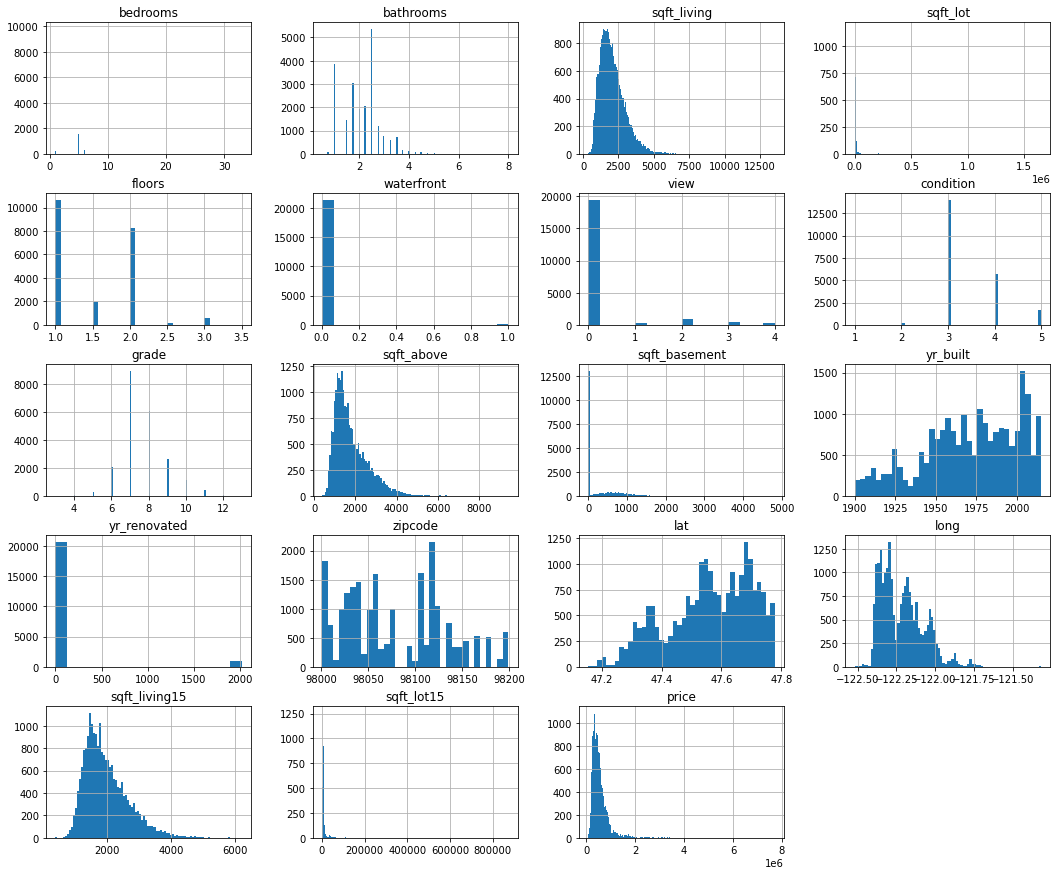

In [14]:
df.hist(bins='auto', figsize=(18,15))

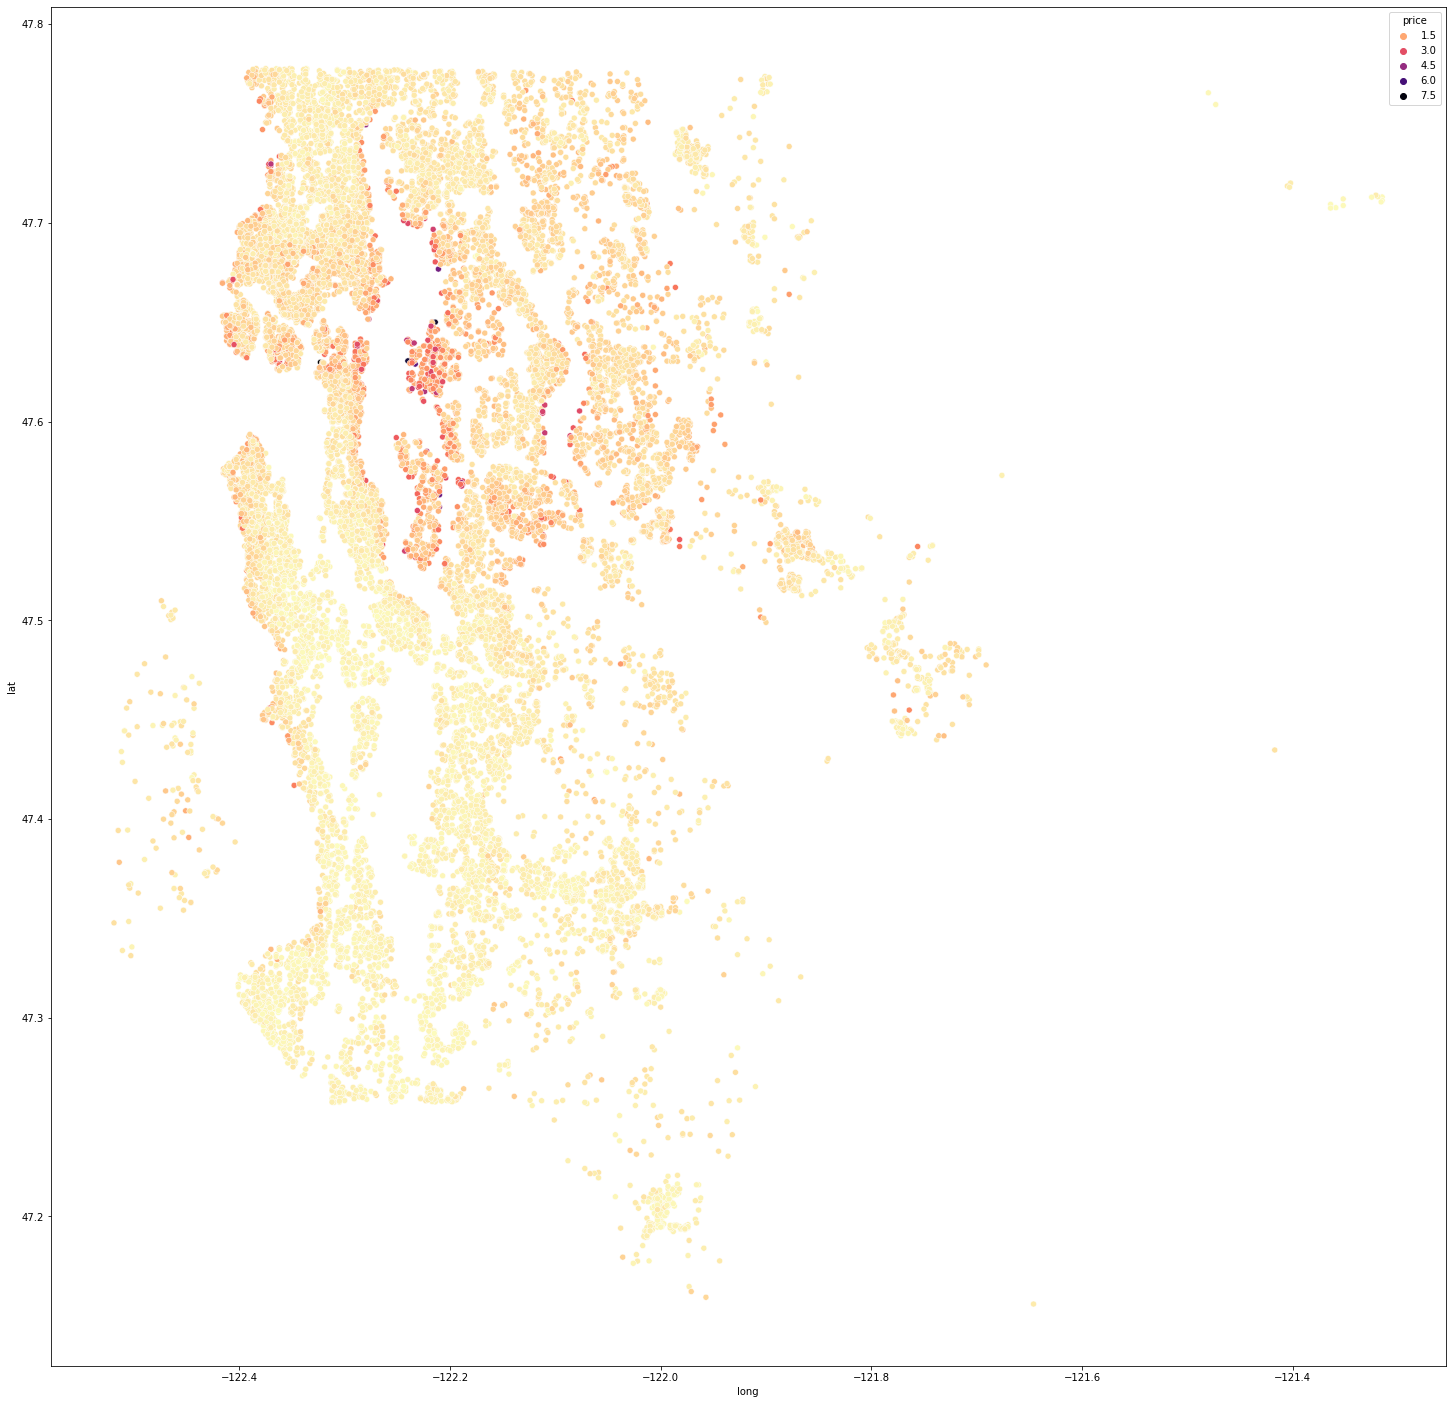

In [16]:
## plotting latitude and longitude as a visual scatter plot to look for location outliers

plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="magma_r");



### Check for multicollinearity 

depending on the model chosen, multicollinearity can impact the accuracy of the model algoritm by giving too much importance to similar features. Reduce this risk by creating the correlation matrix, consider dropping any one of two very similar numerical features, judging by their correlation score (spearmans or pearsons) 

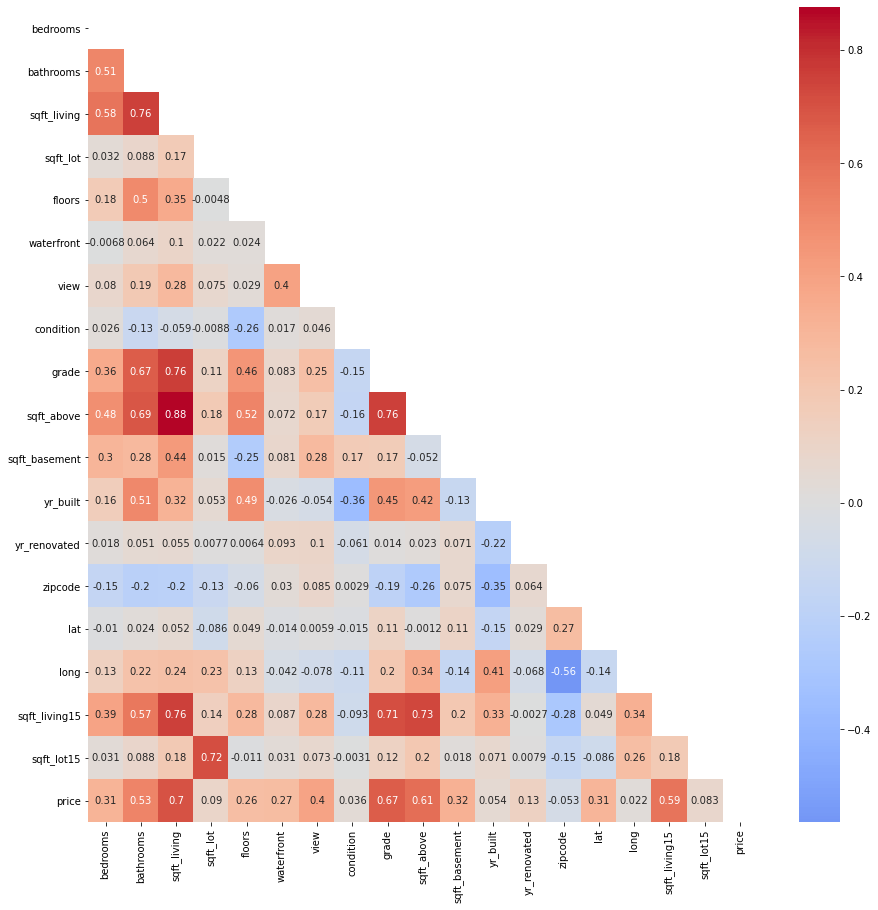

In [17]:
fig, ax = plt.subplots(figsize = (15, 15))

mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask = mask, annot = True, cmap = 'coolwarm', center = 0)

plt.show()



### Clean and wrangling steps 

#### List here any cleaning or wrangling steps to return to on a second iteration of your model 


+ drop latitudes that are far from the center
+ 


### split off the dependant variable (label)

In [18]:
X=df.drop(columns=['price'])
y=df['price']

In [19]:
X.shape

(21597, 18)

In [20]:
y.shape

(21597,)

### Pre processing - iteration 1 

+ the minimum requirements here depend on the model chosen. ie, for linear regression you must label / encode any categorical (object type) columns, nulls must also have been eliminated at this stage - as the model only works with numbers. 

at this stage it is possible to proceed to your baseline (worst case) model

---- 
OR 

+ you can consider applying a scaling method for the numerical features
+ this is best applied after dealing with any extreme outlier values



### import the chosen model 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
import math

### train test split - select a % test data set and set your random seed 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### apply model and train model 

In [ ]:
ln = LinearRegression()

In [28]:
ln.fit(X_train,y_train)

LinearRegression()

### evaluate accuracy against test dataset  

In [29]:
y_train_pred = ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred = ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print('train r2: ' + str(r2_train))
print('test r2: ' + str(r2_test))

train r2: 0.6979368389046712
test r2: 0.70814312421674


#### next steps

+ Consider the accuracy of predictions, especially the Rsquared and MAE (which in this case describes in dollars, how far away from predicting an accurate house price your model is)

+ also think about - is there anything I could return to to improve my model accuracy?? 

### Pre processing iteration 2 & 3 and ... 

It is best to attempt at least two more experimental rounds of pre processing in order to run the models and compare the results. This time, you could be more selective in your features, do more feature engineering or data wrangling, use a different method for imputing nulls/ dealing with outliers, apply a couple of different scaling method to numerical columns to normalise their distribution or convert numerical features to categories in a logical way 

In [36]:
from sklearn.preprocessing import MinMaxScaler

#scaling the data
X=df.drop(columns=['price'])
y=df['price']

#scale with MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


### train test split - select a % test data set and set your random seed 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

### apply model and train model 

In [38]:
ln = LinearRegression()

In [39]:
ln.fit(X_train, y_train)

LinearRegression()

### evaluate accuracy against test dataset  

In [41]:
y_train_pred = ln.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred = ln.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print('train r2: ' + str(r2_train))
print('test r2: ' + str(r2_test))

train r2: 0.6979341727919031
test r2: 0.7081974226468664


### Compare, visually or in a summary cell, your regression model metrics for each iteration. 

+ Which model and techniques combined worked best? 